In [1]:
# Mubeen Quadrt - ECGR 4105: Homework 0

# Based off class Linear Regression example provided

#libraries used:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MubeenQ/IntroMLHW/main/D3.csv')
df.head() 
M=len(df)
M


99

In [112]:
#Problem 1 - X1 

X1 = df.values[:, 0] # get input values from first column
y = df.values[:, 3] # get output values from fourth column
m = len(y) 
print('X1 = ', X1[: 5]) 
print('y = ', y[: 5])
print('m = ', m)


X1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202 ]
y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]
m =  99


In [24]:
X1 = df.values[:, 0] # get input values from first column
y = df.values[:, 3] # get output values from fourth column
m = len(y) 
print('X1 = ', X1[: 97]) 
print('y = ', y[: 97])
print('m = ', m)


X1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202  0.24242424
 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444 0.48484848
 0.52525253 0.56565657 0.60606061 0.64646465 0.68686869 0.72727273
 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293 0.96969697
 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717 1.21212121
 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141 1.45454545
 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566 1.6969697
 1.73737374 1.77777778 1.81818182 1.85858586 1.8989899  1.93939394
 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414 2.18181818
 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838 2.42424242
 2.46464646 2.50505051 2.54545455 2.58585859 2.62626263 2.66666667
 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687 2.90909091
 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111 3.15151515
 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535 3.39393939
 3.43434343 3.47474747 3.51515152 3.55555556 3.5959596  3

Text(0.5, 1.0, 'D3 Dataset Scatter Plot')

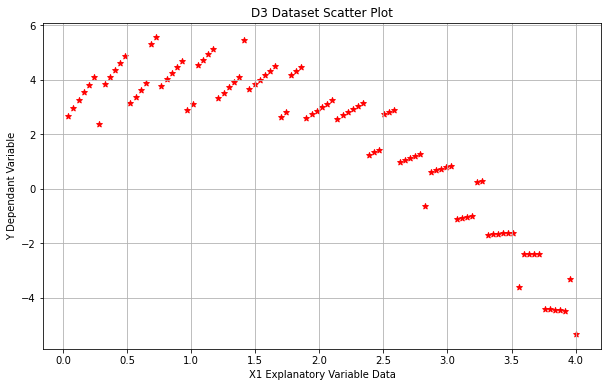

In [113]:
plt.scatter(X1,y, color='red',marker= '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X1 Explanatory Variable Data')
plt.ylabel('Y Dependant Variable')
plt.title('D3 Dataset Scatter Plot')


In [114]:
#Lets create a matrix with single column of ones
X1_0 = np.ones((m, 1))
X1_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [115]:
# Using reshape function convert X1 1D array to 2D array of dimension 97x1
X1_1 = X1.reshape(m, 1)
X1_1[:10]

array([[0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636],
       [0.4040404 ]])

In [116]:
# Lets use hstack() function from numpy to stack X1_0 and X1_1 horizontally (i.e. column
# This will be our final X1 matrix (feature matrix)
X1 = np.hstack((X1_0, X1_1))
X1[:5]


array([[1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616],
       [1.        , 0.2020202 ]])

In [117]:
theta = np.zeros(2)
theta


array([0., 0.])

In [118]:
def compute_cost(X1, y, theta):
 """

 X1 : Explanatory Vairable

 y : Dependant Variable
 
 """
 predictions = X1.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J


In [119]:
# Lets compute the cost for theta values
cost = compute_cost(X1, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.483015861682611


In [120]:
def gradient_descent(X1, y, theta, alpha, iterations):
 """
 X1 : 2D array where each row represent the training example and each column represent
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.

 """
 cost_history = np.zeros(iterations)
    
 for i in range(iterations):
     predictions = X1.dot(theta)
     errors = np.subtract(predictions, y)
     sum_delta = (alpha / m) * X1.transpose().dot(errors);
     theta = theta - sum_delta;
     cost_history[i] = compute_cost(X1, y, theta)
        
 return theta, cost_history

In [122]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;


In [123]:
theta, cost_history = gradient_descent(X1, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.75752967 -1.97114532]
cost_history = [5.4416155  5.40304386 5.36697031 ... 0.98927932 0.98925005 0.98922091]


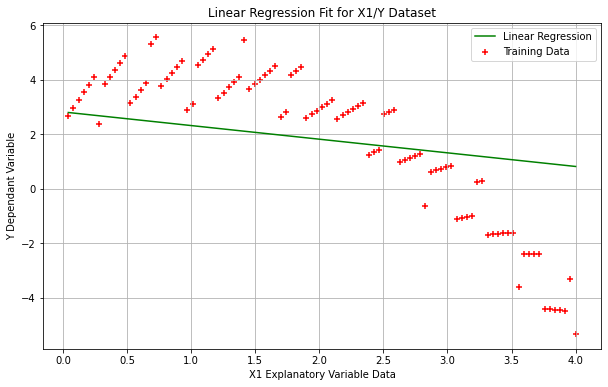

In [152]:

# Since X1 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X1[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X1[:,1],X1.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1 Explanatory Variable Data')
plt.ylabel('Y Dependant Variable')
plt.title('Linear Regression Fit for X1/Y Dataset')
plt.legend()


Text(0.5, 1.0, 'Convergence of gradient descent')

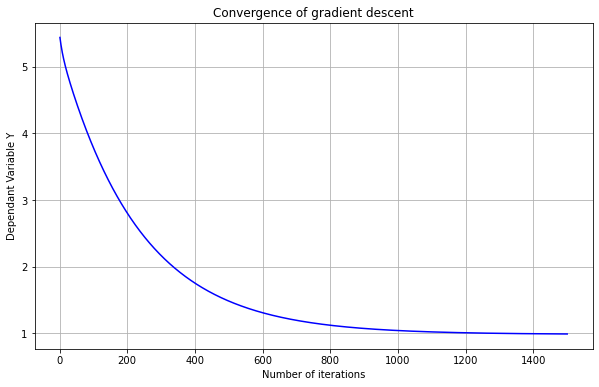

In [124]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Dependant Variable Y')
plt.title('Convergence of gradient descent')


In [125]:
# Problem 1 - X2

X2 = df.values[:, 1] # get input values from second column
y = df.values[:, 3] # get output values from fourth column
m = len(y) 
print('X2 = ', X2[: 5]) 
print('y = ', y[: 5])
print('m = ', m)

X2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747]
y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]
m =  99


In [66]:
X2 = df.values[:, 1] # get input values from second column
y = df.values[:, 3] # get output values from fourth column
m = len(y) 
print('X2 = ', X2[: 97]) 
print('y = ', y[: 97])
print('m = ', m)

X2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747 3.60969697
 0.30464646 0.99959596 1.69454545 2.38949495 3.08444444 3.77939394
 0.47434343 1.16929293 1.86424242 2.55919192 3.25414141 3.94909091
 0.6440404  1.3389899  2.03393939 2.72888889 3.42383838 0.11878788
 0.81373737 1.50868687 2.20363636 2.89858586 3.59353535 0.28848485
 0.98343434 1.67838384 2.37333333 3.06828283 3.76323232 0.45818182
 1.15313131 1.84808081 2.5430303  3.2379798  3.93292929 0.62787879
 1.32282828 2.01777778 2.71272727 3.40767677 0.10262626 0.79757576
 1.49252525 2.18747475 2.88242424 3.57737374 0.27232323 0.96727273
 1.66222222 2.35717172 3.05212121 3.74707071 0.4420202  1.1369697
 1.83191919 2.52686869 3.22181818 3.91676768 0.61171717 1.30666667
 2.00161616 2.69656566 3.39151515 0.08646465 0.78141414 1.47636364
 2.17131313 2.86626263 3.56121212 0.25616162 0.95111111 1.64606061
 2.3410101  3.0359596  3.73090909 0.42585859 1.12080808 1.81575758
 2.51070707 3.20565657 3.90060606 0.59555556 1.29050505 1

Text(0.5, 1.0, 'D3 Dataset Scatter Plot')

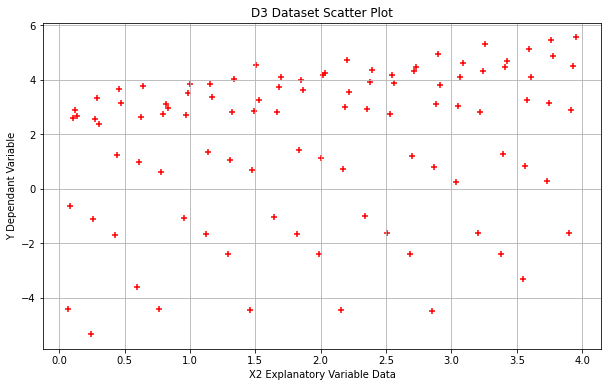

In [126]:
plt.scatter(X2,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X2 Explanatory Variable Data')
plt.ylabel('Y Dependant Variable')
plt.title('D3 Dataset Scatter Plot')

In [127]:
#Lets create a matrix with single column of ones
X2_0 = np.ones((m, 1))
X2_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [128]:
# Using reshape function convert X2 1D array to 2D array of dimension 97X2
X2_1 = X2.reshape(m, 1)
X2_1[:10]

array([[0.13494949],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454545],
       [2.38949495]])

In [129]:
# Lets use hstack() function from numpy to stack X2_0 and X2_1 horizontally (i.e. column
# This will be our final X2 matrix (feature matrix)
X2 = np.hstack((X2_0, X2_1))
X2[:5]


array([[1.        , 0.13494949],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798],
       [1.        , 2.91474747]])

In [130]:
theta = np.zeros(2)
theta

array([0., 0.])

In [131]:
def compute_cost(X2, y, theta):
 """
 
 X2 : Explanatory Vairable

 y : Dependant Variable
 
 """
 predictions = X2.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J


In [132]:
# Lets compute the cost for theta values
cost = compute_cost(X2, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.483015861682611


In [133]:
def gradient_descent(X2, y, theta, alpha, iterations):
 """
 X2 : 2D array where each row represent the training example and each column represent
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 
 """
 cost_history = np.zeros(iterations)
    
 for i in range(iterations):
     predictions = X2.dot(theta)
     errors = np.subtract(predictions, y)
     sum_delta = (alpha / m) * X2.transpose().dot(errors);
     theta = theta - sum_delta;
     cost_history[i] = compute_cost(X2, y, theta)
        
 return theta, cost_history

In [134]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.05; #Changed learning rate slightly


In [135]:
theta, cost_history = gradient_descent(X2, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [0.75592879 0.5387824 ]
cost_history = [4.53773152 4.07898263 3.85619631 ... 3.62015665 3.62015665 3.62015665]


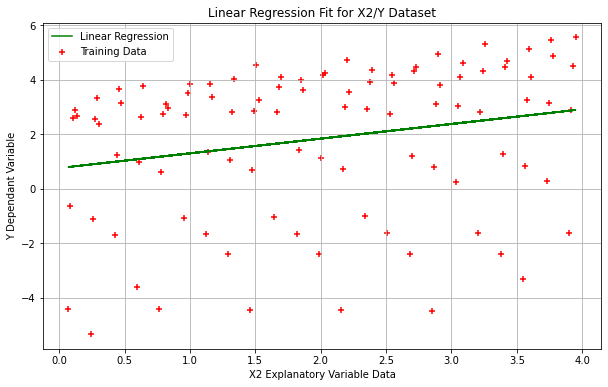

In [136]:

# Since X2 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X2[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X2[:,1],X2.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2 Explanatory Variable Data')
plt.ylabel('Y Dependant Variable')
plt.title('Linear Regression Fit for X2/Y Dataset')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

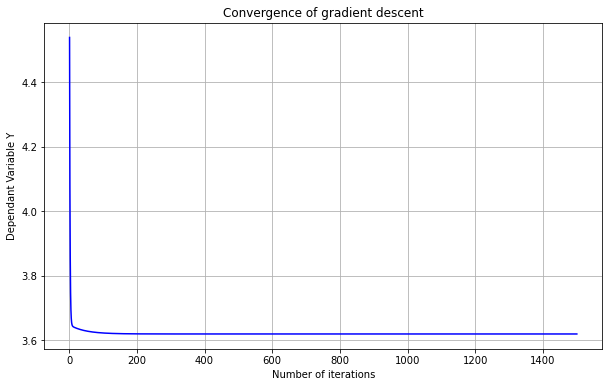

In [137]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Dependant Variable Y')
plt.title('Convergence of gradient descent')


In [138]:
#Problem 1 - X3

X3 = df.values[:, 2] # get input values from third column
y = df.values[:, 3] # get output values from fourth column
m = len(y) 
print('X3 = ', X3[: 5]) 
print('y = ', y[: 5])
print('m = ', m)


X3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424]
y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]
m =  99


In [81]:
X3 = df.values[:, 2] # get input values from third column
y = df.values[:, 3] # get output values from fourth column
m = len(y) 
print('X3 = ', X3[: 97]) 
print('y = ', y[: 97])
print('m = ', m)

X3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424 3.13090909
 3.57939394 0.02787879 0.47636364 0.92484848 1.37333333 1.82181818
 2.27030303 2.71878788 3.16727273 3.61575758 0.06424242 0.51272727
 0.96121212 1.40969697 1.85818182 2.30666667 2.75515152 3.20363636
 3.65212121 0.10060606 0.54909091 0.99757576 1.44606061 1.89454545
 2.3430303  2.79151515 3.24       3.68848485 0.1369697  0.58545455
 1.03393939 1.48242424 1.93090909 2.37939394 2.82787879 3.27636364
 3.72484848 0.17333333 0.62181818 1.07030303 1.51878788 1.96727273
 2.41575758 2.86424242 3.31272727 3.76121212 0.20969697 0.65818182
 1.10666667 1.55515152 2.00363636 2.45212121 2.90060606 3.34909091
 3.79757576 0.24606061 0.69454545 1.1430303  1.59151515 2.04
 2.48848485 2.9369697  3.38545455 3.83393939 0.28242424 0.73090909
 1.17939394 1.62787879 2.07636364 2.52484848 2.97333333 3.42181818
 3.87030303 0.31878788 0.76727273 1.21575758 1.66424242 2.11272727
 2.56121212 3.00969697 3.45818182 3.90666667 0.35515152 0.8036

Text(0.5, 1.0, 'D3 Dataset Scatter Plot')

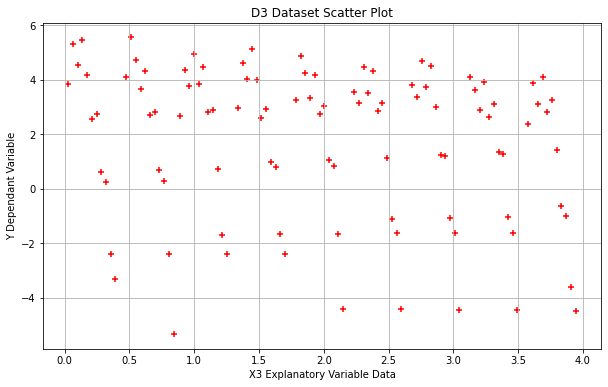

In [139]:
plt.scatter(X3,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X3 Explanatory Variable Data')
plt.ylabel('Y Dependant Variable')
plt.title('D3 Dataset Scatter Plot')

In [140]:
#Lets create a matrix with single column of ones
X3_0 = np.ones((m, 1))
X3_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [141]:
# Using reshape function convert X3 1D array to 2D array of dimension 97x1
X3_1 = X3.reshape(m, 1)
X3_1[:10]

array([[0.88848485],
       [1.3369697 ],
       [1.78545455],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364],
       [0.92484848]])

In [142]:
# Lets use hstack() function from numpy to stack X3_0 and X3_1 horizontally (i.e. column
# This will be our final X3 matrix (feature matrix)
X3 = np.hstack((X3_0, X3_1))
X3[:5]

array([[1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545455],
       [1.        , 2.23393939],
       [1.        , 2.68242424]])

In [143]:
theta = np.zeros(2)
theta

array([0., 0.])

In [144]:
def compute_cost(X3, y, theta):
 """
 
 X3 : Explanatory Vairable

 y : Dependant Variable
 
 """
 predictions = X3.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J


In [145]:
# Lets compute the cost for theta values
cost = compute_cost(X3, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.483015861682611


In [146]:
def gradient_descent(X3, y, theta, alpha, iterations):
 """
 
 X3 : 2D array where each row represent the training example and each column represent
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 
 """
 cost_history = np.zeros(iterations)
    
 for i in range(iterations):
     predictions = X3.dot(theta)
     errors = np.subtract(predictions, y)
     sum_delta = (alpha / m) * X3.transpose().dot(errors);
     theta = theta - sum_delta;
     cost_history[i] = compute_cost(X3, y, theta)
        
 return theta, cost_history

In [147]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.1; # Changed learning rate slightly

In [148]:
theta, cost_history = gradient_descent(X3, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 2.81356727 -0.50011833]
cost_history = [4.63345925 4.46796219 4.41269659 ... 3.6503     3.6503     3.6503    ]


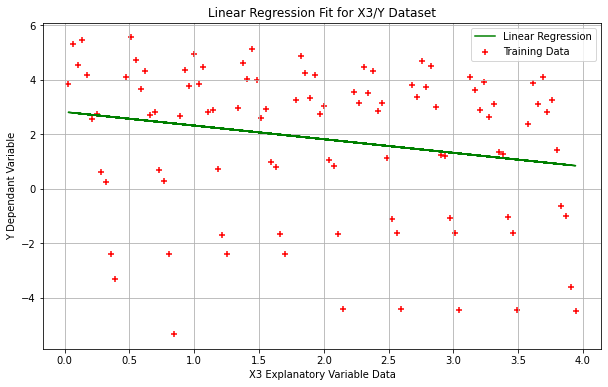

In [149]:

# Since X3 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X3[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X3[:,1],X3.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X3 Explanatory Variable Data')
plt.ylabel('Y Dependant Variable')
plt.title('Linear Regression Fit for X3/Y Dataset')
plt.legend()


Text(0.5, 1.0, 'Convergence of gradient descent')

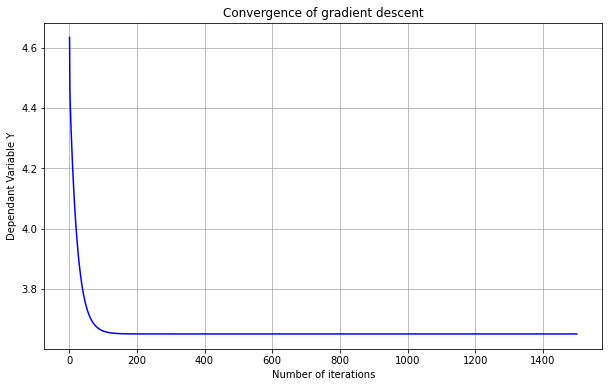

In [150]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Dependant Variable Y')
plt.title('Convergence of gradient descent')